<h1 style="text-align: center; background: #145c7e; color: white; font-weight: bold; padding: 5px 0">Análisis de la personalidad del cliente </h1>

<center> <img src="analisis.jpg" alt="Análisis de la personalidad del cliente" width=300px> </center>

<h2 style="text-align: center; background: #157991; color: white; font-weight: bold; padding: 5px 0"> Índice </h2>

<div style="background: #fffbf4; padding: 3px 0">
    <ol>
        <li> <a href="#int"> Introducción </a> </li>
        <li> <a href="#at"> Atributos </a> </li>
        <li> <a href="#im"> Importando librerías y cargando los datos </a> </li>
        <li> <a href="#ex"> Exploratory Data Analysis (EDA) y Feature Engineering </a> </li>
        <ul>
            <li> <a href="#val"> Valores faltantes y duplicados </a> </li>
            <li> <a href="#cod"> Codificación </a> </li>
            <li> <a href="#fe"> Feature Engineering </a> </li>
            <li> <a href="#out"> Valores atípicos (Outliers) </a> </li>
            <li> <a href="#sca"> Featuring Scaling </a> </li>
        </ul>
        <li> <a href="#pca"> PCA </a> </li> 
        <li> <a href="#reg"> Linear regression </a> </li>
        <ul>
            <li> <a href="#d_reg"> Deducción </a> </li>
        </ul>
        <li> <a href="#mlr"> Multiple Linear Regression </a> </li>
        <ul>
            <li> <a href="#d_mlr"> Deducción </a> </li>
        </ul>
        <li> <a href="#clustering"> Clustering </a> </li>
        <ul>
            <li> <a href="#k_pca"> K-Means con PCA </a> </li>
            <li> <a href="#k"> K-Means sin PCA </a> </li>
            <li> <a href="#hpca"> Hierarchical Clustering PCA </a> </li>
            <li> <a href="#h"> Hierarchical Clustering  </a> </li>
            <li> <a href="#ev_clu"> Evaluando los datos  </a> </li>
            <li> <a href="#d_clus"> Deducción </a> </li>
        </ul>
        <li> <a href="#dt"> Decision tree </a> </li>
        <ul>
            <li> <a href="#d_dt"> Deducción </a> </li>
        </ul>
        <li> <a href="#randForest"> Random Forest </a> </li>
        <ul>
            <li> <a href="#d_rand"> Deducción </a> </li>
        </ul>
    </ol>
</div>

<a id="int"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Introducción </h2>

El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita modificar los productos de acuerdo con las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto para cada cliente de la base de datos de la empresa, una empresa puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y luego comercializarlo sólo en ese segmento en particular.

<a id="at"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Atributos </h2>

### Persona

- **ID:** Identificador único del cliente
- **Year_Birth:** Año de nacimiento del cliente
- **Education:** Nivel de educación del cliente.
- **Marital_Status:** Estado civil del cliente
- **Income:** Ingresos anuales del hogar del cliente
- **Kidhome:** Número de niños en el hogar del cliente
- **Teenhome:** Número de adolescentes en el hogar del cliente
- **Dt_Customer:** Fecha de alta del cliente en la empresa
- **Recency:** Número de días desde la última compra del cliente.
- **Complain:** 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

### Producto

- **MntWines**: Cantidad gastada en vino en los últimos 2 años
- **MntFruits:** Cantidad gastada en frutas en los últimos 2 años
- **MntMeatProducts:** Cantidad gastada en carne en los últimos 2 años
- **MntFishProducts:** Cantidad gastada en pescado en los últimos 2 años
- **MntSweetProducts:** Cantidad gastada en dulces en los últimos 2 años
- **MntGoldProds:** Cantidad gastada en oro en los últimos 2 años

### Promoción

- **NumDealsPurchases:** Número de compras realizadas con descuento
- **AcceptedCmp1:** 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario
- **AcceptedCmp2:** 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario
- **AcceptedCmp3:** 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario
- **AcceptedCmp4:** 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario
- **AcceptedCmp5:** 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario
- **Response:** 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

### Lugar

- **NumWebPurchases:** Número de compras realizadas a través del sitio web de la empresa
- **NumCatalogPurchases:** Número de compras realizadas mediante un catálogo
- **NumStorePurchases:** Número de compras realizadas directamente en tiendas
- **NumWebVisitsMonth:** Número de visitas al sitio web de la empresa en el último mes


<a id="im"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Importando librerías y cargando los datos </h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<a id="ex"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Exploratory Data Analysis (EDA) y Feature Engineering </h2>

In [3]:
df.shape

(2240, 29)

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

<a id="val"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: white; padding: 5px 0"> Valores faltantes y duplicados </h3>

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Para el análisis de los valores nulos, se pueden tratar de distintas maneras, como hacer una sustitución con la media, la mediana o la moda, pero al ser muy pocos datos nulos, se opta la decisión de eliminarlos.

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<a id="cod"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Codificación </h3>

Cambiamos los valores categóricos de `Education` a un significado en español

In [9]:
df['Education'] = df['Education'].map(
    {'Basic':'Básica',
    '2n Cycle':'Preparatoria',
    'Graduation':'Universidad',
    'Master':'Maestría',
    'PhD':'Doctorado'})

Colocamos los campos de `Alone`, `Absurd` y `YOLO` en `Single`

In [10]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Alone','Absurd', 'YOLO'] else x)
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64

Cambiamos los valores categóricos de `Marital_Status` a un significado en español

In [12]:
df['Marital_Status'] = df['Marital_Status'].map(
    {'Married':'Casado',
    'Together':'Unión',
    'Single':'Soltero',
    'Divorced':'Divorciado',
    'Widow':'Viudo'})

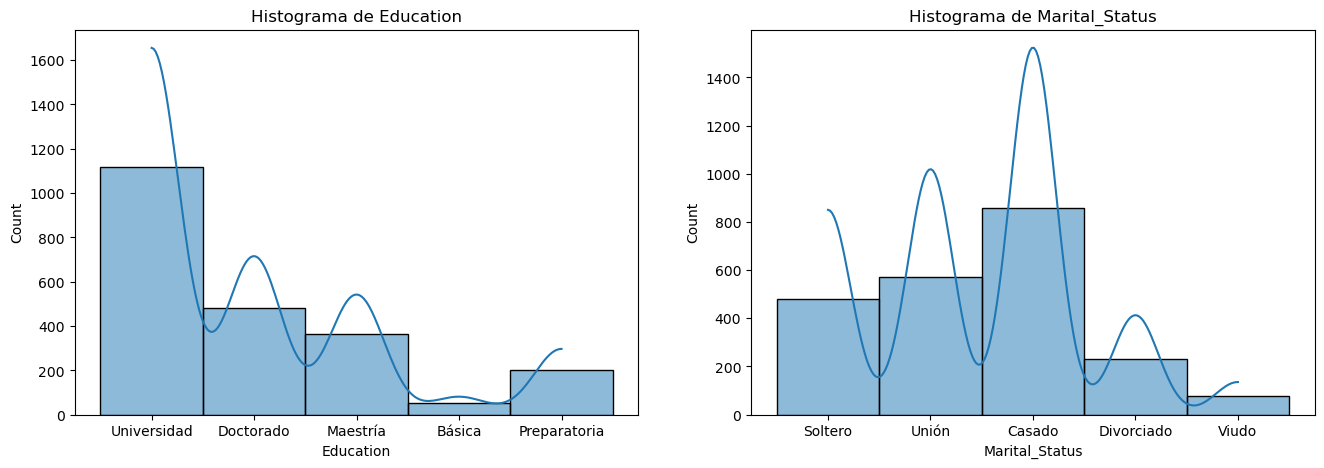

In [13]:
var_cat = df.select_dtypes(include=['object','category']).columns
var_cat = var_cat.drop('Dt_Customer')

fig, ax = plt.subplots(1, len(var_cat), figsize=(16, 5))   
for i, cat in enumerate(var_cat):    
    sns.histplot(data=df, x=cat, kde=True, ax=ax[i])
    ax[i].set_title(f'Histograma de {cat}')

Se considero apropiado usar un Label Encoder en `Education`, para que todo el Dataset se encuentre numérico, pero antes hagamos una copia de nuestro dataset para futuras predicciones.

In [14]:
df['Education'] = df['Education'].map(
    {'Básica':0,
    'Preparatoria':1,
    'Universidad':2,
    'Maestría':3,
    'Doctorado':4})

`Marital_Status` vamos a usarlo en binario: 
- Si está con pareja (Unión, Casado) --> 1
- Si está solo (Soltero, Divorciado, Viduo) --> 0

In [15]:
df['Marital_Status'] = df['Marital_Status'].apply(
    lambda x: 1 if x in ['Unión','Casado'] else 0
)

Verficamos el gráfico nuevamente

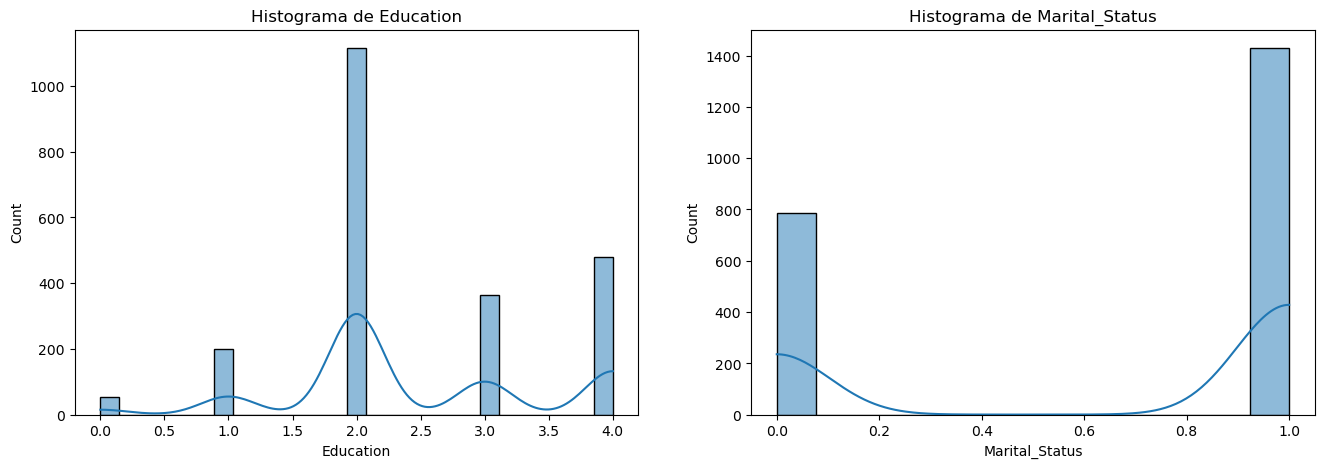

In [16]:
fig, ax = plt.subplots(1, len(var_cat), figsize=(16, 5))   
for i, cat in enumerate(var_cat):    
    sns.histplot(data=df, x=cat, kde=True, ax=ax[i])
    ax[i].set_title(f'Histograma de {cat}')

Ahora la variable `Dt_customer` se pasa a formato fecha (día-mes-año)

In [17]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

<a id="fe"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Feature Engineering </h3>

Eliminamos variables que tienen escasa relevancia práctica o cuya naturaleza y propósito son desconocidos

In [18]:
df.drop(columns=['ID', 'Z_CostContact','Z_Revenue'], axis=1, inplace=True)

Agreguemos un campo de `Age` (El dataset es del 2014, es por eso que se ocupa esa fecha y no 2014)

In [19]:
df['Age'] = 2014-df['Year_Birth']

Eliminamos también `Year_Birth` ya que no se ocupara 

In [20]:
df.drop(['Year_Birth'], axis=1, inplace=True)

Ahora uniremos `Kidhome` con `Teenhome` en una variable llamada `Children`

In [21]:
df['Children'] = df['Kidhome']+df['Teenhome']

Ahora uniremos todas las cantidades gastadas en los últimos dos años

In [22]:
df['MntSpent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds']+df['MntFishProducts']

Ahora agregaremos una variable para ver la antiguedad en la empresa, el dataset está en la fecha del 04-10-2014, por lo que colocaremos esa fecha como referente, y lo pondremos en meses, porque hay personas que llevan meses y no años

In [23]:
last_date = pd.to_datetime('04-10-2014', format='%d-%m-%Y')
df['Seniority_months']  = df['Dt_Customer'].apply(lambda x: (last_date - x).days / 30).round()

Con esto podemos eliminar ya el `Dt_Customer`

In [24]:
df.drop(columns=['Dt_Customer'], axis=1, inplace=True)

Agregaremos una variable `Family_size`, para ver cuantas personas viven juntas

In [25]:
df['Family_size'] = df['Children'] + df['Marital_Status'] + 1

<a id="out"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Valores atípicos (Outliers) </h3>

Ahora revisaremos los outliers para eliminarlos, en este caso solo `Age` e `Income` tenian outliers, sin embargo, con describe podemos vizualizar si existiera otro

In [26]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,MntSpent,Seniority_months,Family_size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.459838,0.645307,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,0.150271,45.179603,0.947202,607.075361,15.000903,2.592509
std,1.004825,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,602.900476,6.763866,0.905722
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,5.000000,3.000000,1.000000
25%,2.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,69.000000,9.000000,2.000000
50%,2.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,396.500000,15.000000,3.000000
75%,3.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,1048.000000,21.000000,3.000000
max,4.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,3.000000,2525.000000,27.000000,5.000000


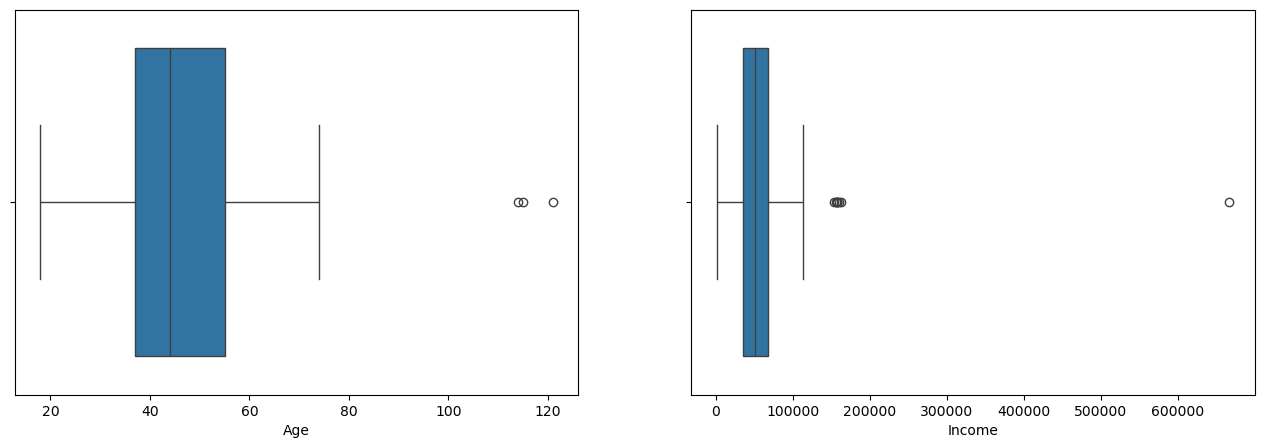

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.boxplot(x=df['Age'], ax=ax[0])
sns.boxplot(x=df['Income'], ax=ax[1])
plt.show()

In [28]:
df = df[df['Age']<80]
df = df[df['Income']<160_000]

Ahora veamos la correlación de los que existen entre los datos

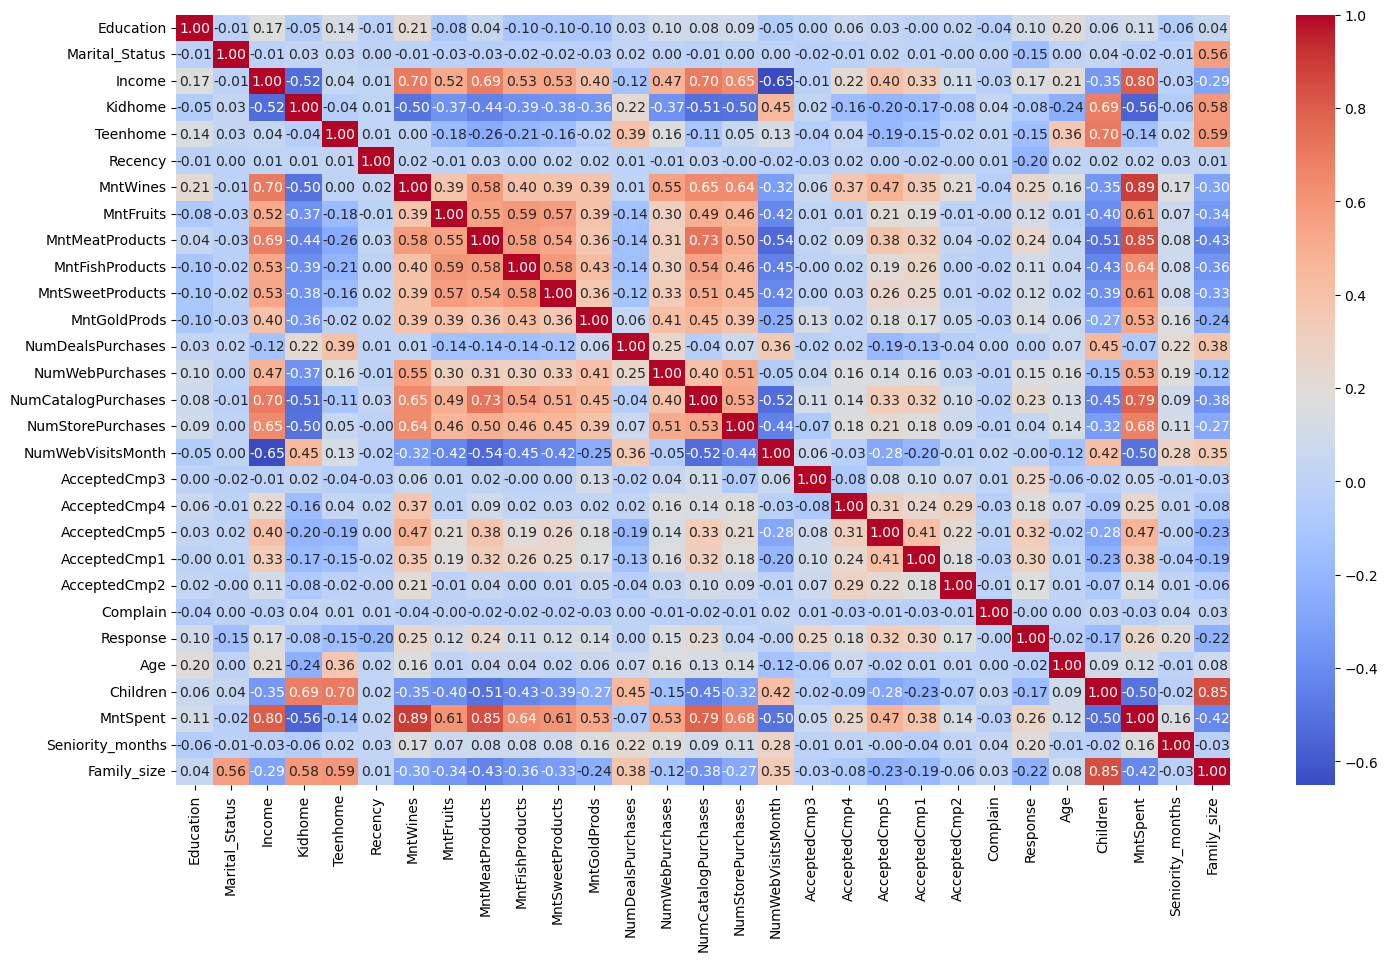

In [29]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<a id="sca"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0">Featuring Scaling </h3>

Ahora llegó el momento de escalar los datos, esto se para que todo tenga una misma dimensión, ya que, todos los algoritmos de cluster, trabajan con distancias, por eso deberian tener una misma escala. Pero antes separemos los datos que **No** necesitan ser escalados de los que **Sí**

In [30]:
bi_columns = []

for col in df.columns:
    if set(df[col].unique()) == {0,1}: bi_columns.append(col)

bi_columns

['Marital_Status',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [31]:
df_scaled = df.copy()
df_scaled.drop(columns=bi_columns, inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(df_scaled)
df_scaled = pd.DataFrame(scaled, columns=df_scaled.columns)
df_scaled.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,MntSpent,Seniority_months,Family_size
0,-0.457742,0.295069,-0.822610,-0.929643,0.309586,0.976803,1.551099,1.708686,2.452212,1.482740,...,0.356943,1.426306,2.550015,-0.557453,0.691320,1.017484,-1.264985,1.677494,1.478200,-1.758287
1,-0.457742,-0.259218,1.040063,0.908023,-0.381475,-0.873048,-0.637647,-0.722260,-0.651258,-0.634390,...,-0.167903,-1.128395,-0.577555,-1.173130,-0.134527,1.273895,1.405136,-0.963293,-1.183162,0.449562
2,-0.457742,0.928359,-0.822610,-0.929643,-0.796112,0.357221,0.569937,-0.177548,1.338614,-0.147694,...,-0.692750,1.426306,-0.230047,1.289579,-0.547451,0.333721,-1.264985,0.280700,-0.148188,-0.654362
3,-0.457742,-1.184972,1.040063,-0.929643,-0.796112,-0.873048,-0.562173,-0.659236,-0.505212,-0.585721,...,-0.167903,-0.763438,-0.925063,-0.557453,0.278396,-1.290216,0.070076,-0.920111,-1.035308,0.449562
4,1.535579,0.302353,1.040063,-0.929643,1.553497,-0.392798,0.418989,-0.218064,0.151993,-0.001685,...,1.406637,0.331434,0.117461,0.058225,-0.134527,-1.033805,0.070076,-0.307249,-0.887455,0.449562


<a id="pca"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> PCA </h2>

In [33]:
from sklearn.decomposition import PCA

Antes de hacer la reducción de dimensionalidad, verifiquemos el número de componentes que necesito con el radio de varianza, para tener casi un 90% de los datos.

In [34]:
pca = PCA()
pca_scaled = pca.fit_transform(df_scaled)
var = pca.explained_variance_ratio_
var

array([3.74761599e-01, 1.28123622e-01, 7.51248312e-02, 6.00517361e-02,
       4.80770598e-02, 4.77562050e-02, 3.64944658e-02, 3.02476097e-02,
       2.99035520e-02, 2.78456752e-02, 2.48553131e-02, 2.10671176e-02,
       2.01869869e-02, 1.85883143e-02, 1.63007299e-02, 1.22194500e-02,
       1.14253484e-02, 9.20520655e-03, 7.76517749e-03, 1.15849011e-32,
       3.46797884e-33])

Ahora hagamos una visualización de la suma acumulada del radio de varianza y veamos cuál es el número de componentes que se ocupara.

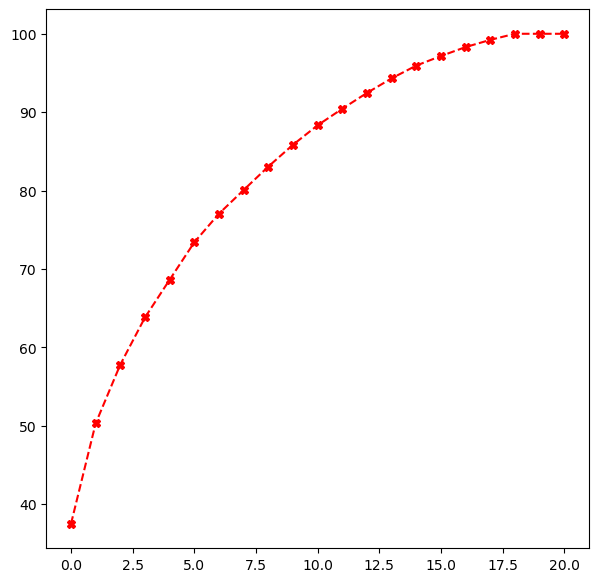

In [35]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(7, 7))
plt.plot(cum_var, 'r--X')
plt.show()

Una vez verificando el número de componentes que necesitamos, reescribamos nuestro PCA

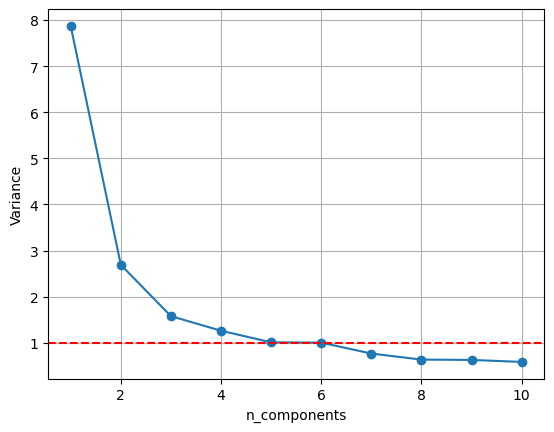

In [36]:
pca = PCA(n_components=10)
pca_scaled = pca.fit_transform(df_scaled)
var = pca.explained_variance_

plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='-')
plt.grid(True)
plt.ylabel('Variance')
plt.xlabel('n_components')
plt.axhline(y=1,color='r',linestyle='--')
plt.show()

Mediante el método del codo vemos que los componentes para usar con el PCA (4)


In [37]:
pca_standard = pd.DataFrame(pca_scaled)
pca_standard.drop([4,5,6,7,8,9],axis=1,inplace=True)

<a id="reg"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Linear regression </h2>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Escogemos nuestra variable independiente y dependiente en un modelo de regresión lineal: 
- <i>y = ax + b</i>

In [39]:
X = df[['Income']]
y = df['MntSpent']

Hacemos la división de los datos en conjuntos de entrenamiento

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora creamos el modelo de regresión lineal y la linea que se ajuste mejor a los datos

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Hacemos la predicción en el conjunto de prueba

In [42]:
y_pred = model.predict(X_test)

Evaluamos el modelo con el Error cuadrático medio (MSE) y el Coeficiente de determinación (R<sup>2</sup>)

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación R^2: {r2}')

Error cuadrático medio: 113485.13794915985
Coeficiente de determinación R^2: 0.6853252740392572


Visualizamos el modelo

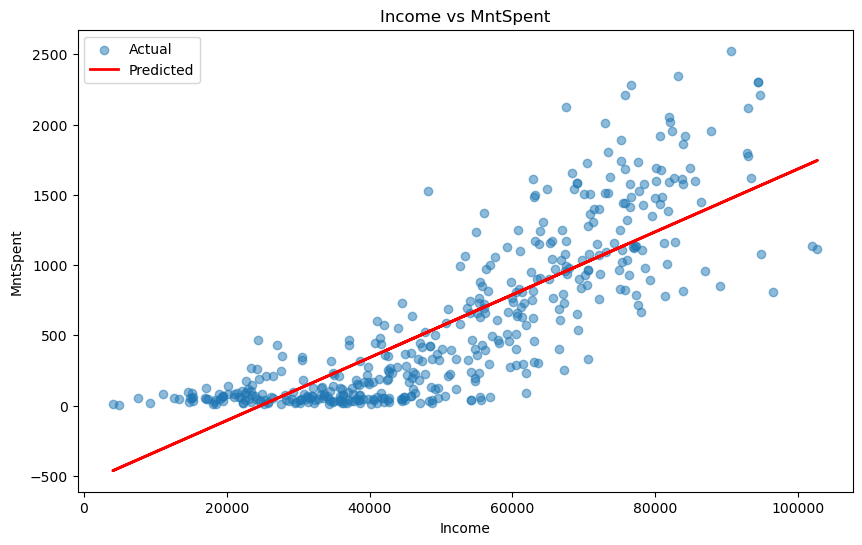

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Income')
plt.ylabel('MntSpent')
plt.title('Income vs MntSpent')
plt.legend()
plt.show()

<a id="d_reg"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Deducción </h3>

Durante los últimos dos años, se puede observar una relación positiva entre el gasto en vino, frutas, carne, pescado, dulces y oro, y el ingreso anual de nuestros clientes. Nuestro análisis revela que aquellos clientes con ingresos más altos tienden a gastar más en algunos de estos productos. Es notable que los clientes cuyo ingreso anual es igual o superior a `$50,000.00` demuestran un mayor nivel de gasto, mientras que aquellos con ingresos anuales inferiores a esta cifra limitan su gasto a necesidades básicas, con un gasto menor a `$500.00`.

<a id="mlr"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Multiple Linear Regression </h2>

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

Escogemos nuestras variable independientes y dependiente en un modelo de regresión lineal múltiple:  
- <i>y = a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + a<sub>n</sub>x<sub>n</sub> + b </i>

In [91]:
features = ['Income', 'Age']

X = df[features]
y = df['MntSpent']

Hacemos la división de los datos en conjuntos de entrenamiento y prueba

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo de regresión lineal con los datos de entrenamiento

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Hacemos la predicción en el conjunto de prueba

In [94]:
y_pred = model.predict(X_test)

Evaluamos el modelo con el Error cuadrático medio (MSE) y el Coeficiente de determinación (R<sup>2</sup>)

In [95]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 114497.1461069142
Coeficiente de determinación (R^2): 0.6825191498588907


Visualización de resultados

In [96]:
x1_range = np.linspace(df['Income'].min(), df['Income'].max())
x2_range = np.linspace(df['Age'].min(), df['Age'].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

def plot_surface_and_scatter(elev, azim):
    plano = pd.DataFrame({'Income': X1.ravel(), 'Age': X2.ravel()})
    
    pred = model.predict(plano).reshape(X1.shape)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, pred, alpha=0.4)
    
    ax.scatter(df['Income'], df['Age'], df['MntSpent'], color='red', marker='o')
    
    ax.set_xlabel('Income')
    ax.set_ylabel('Age')
    ax.set_zlabel('MntSpent')
    ax.set_title('Superficie de Predicción y Datos Reales')
    
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()

# Interact para crear controles deslizantes interactivos
interact(plot_surface_and_scatter, 
         elev=FloatSlider(min=0, max=90, step=5, value=30, description='Elevación'),
         azim=FloatSlider(min=0, max=360, step=5, value=30, description='Azimut'))

interactive(children=(FloatSlider(value=30.0, description='Elevación', max=90.0, step=5.0), FloatSlider(value=…

<function __main__.plot_surface_and_scatter(elev, azim)>

<a id="d_mlr"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Deducción </h3>

A primera vista en nuestro modelo, hemos observado que el gasto de cada cliente está correlacionado con la edad. Sin embargo, hemos notado que la mayor parte de la distribución de ingresos y gastos muestra que los gastos son generalmente inferiores a `$1,000.00` para todas las edades comprendidas entre 18 y 74 años. Asimismo, observamos que la mayoría de los clientes tienen ingresos inferiores a `$80,000.00`, y que algunos de los que tienen mayores ingresos están concentrados entre las edades de 30 a 40 años y mayores de 60 años, los demás se sitúan en niveles dentro del promedio general de ingresos.

<a id="clustering"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Clustering </h2>

In [52]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

<a id="k_pca"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> K-Means con PCA </h3>

Aplicamos KMeans sobre nuestro dataset que tiene reducción de dimensionalidad `pca_standard`

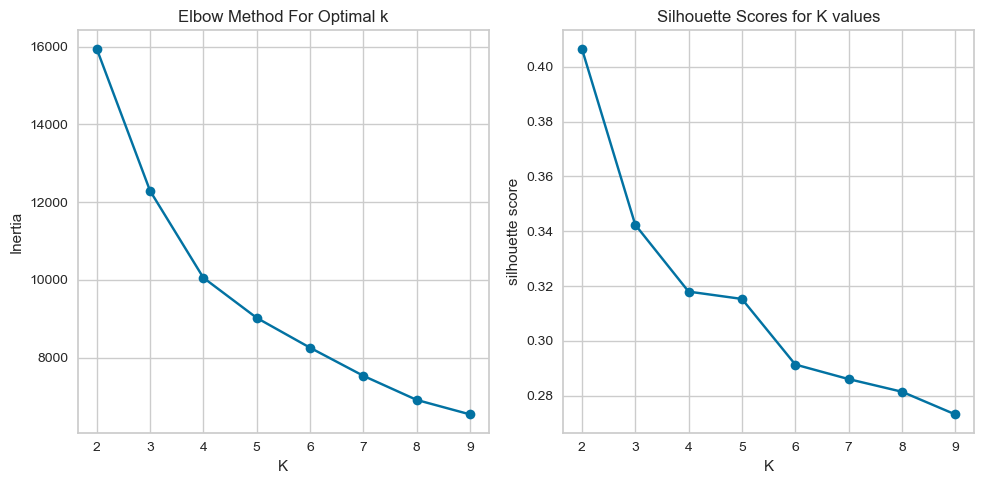

In [53]:
sum_of_squeared_distances = []
silhouette_scores = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k,  n_init=10, random_state=42)
    y_pred = kmeans.fit_predict(pca_standard)
    
    sum_of_squeared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_standard, y_pred))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squeared_distances, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Scores for K values')
plt.xlabel('K')
plt.ylabel('silhouette score')

plt.tight_layout()
plt.show()

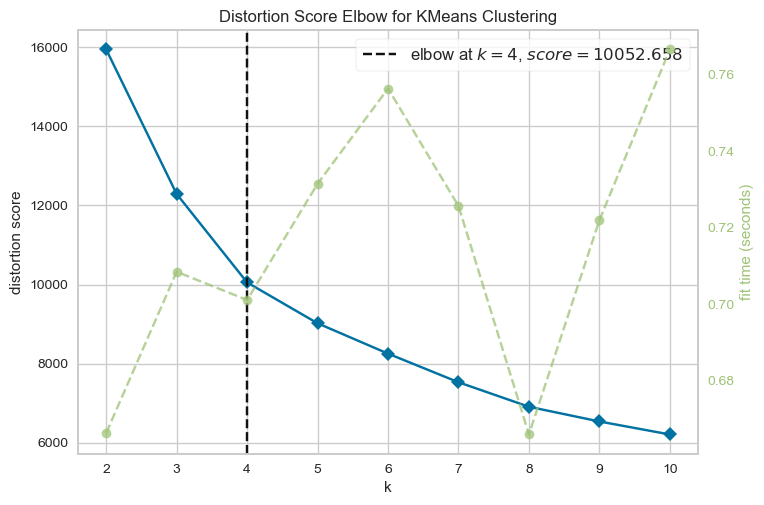

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
Elbow_M = KElbowVisualizer(KMeans(n_init=10, random_state=42), k=10)
Elbow_M.fit(pca_standard)
Elbow_M.show()

In [55]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(pca_standard)

print(silhouette_score(pca_standard, y_pred))

df['k_means_pca'] = y_pred

0.3423577606149482


<a id="k"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> K-Means sin PCA </h3>

Ahora, aplicamos KMeans sobre nuestro dataset que no tiene reducción de dimensionalidad `df_scaled`

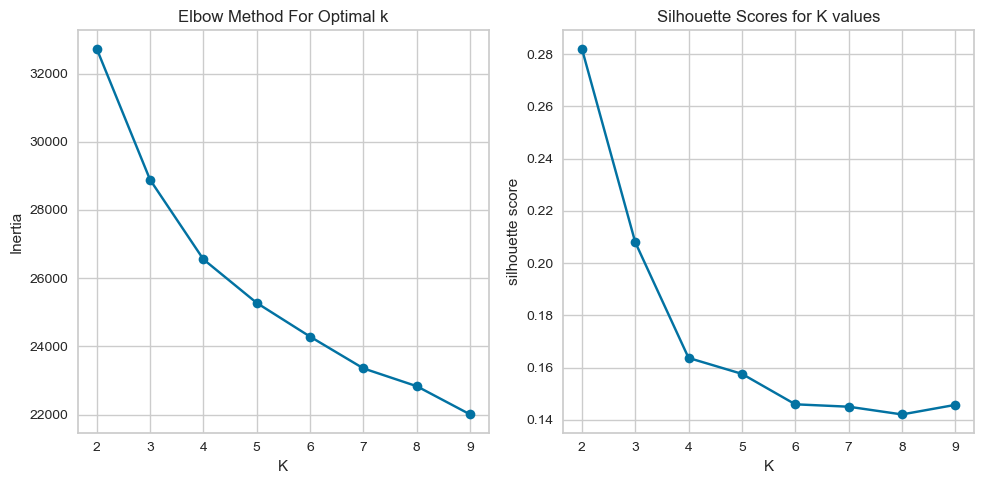

In [56]:
sum_of_squeared_distances = []
silhouette_scores = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    y_pred = kmeans.fit_predict(df_scaled)
    
    sum_of_squeared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, y_pred))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squeared_distances, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Scores for K values')
plt.xlabel('K')
plt.ylabel('silhouette score')

plt.tight_layout()
plt.show()

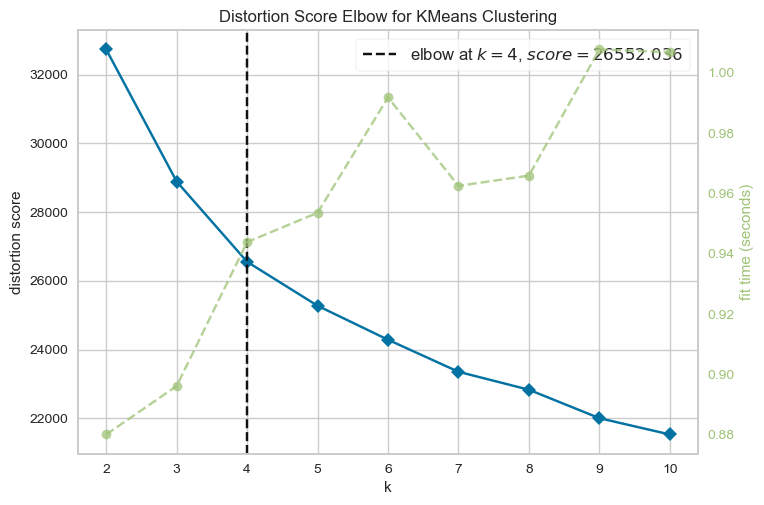

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
Elbow_M = KElbowVisualizer(KMeans(n_init=10, random_state=42), k=10)
Elbow_M.fit(df_scaled)
Elbow_M.show()

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

print(silhouette_score(df_scaled, y_pred))

df['k_means'] = y_pred

0.20964756494289397


<a id="hpca"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Hierarchical Clustering PCA </h3>

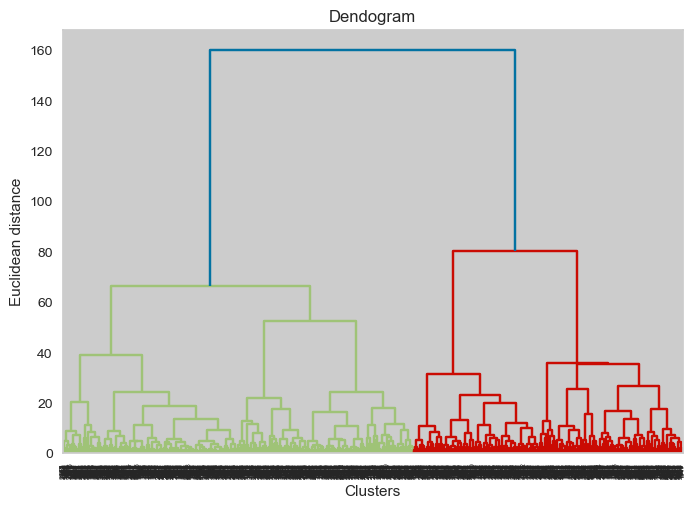

In [59]:
dendogram_plot = dendrogram(linkage(pca_standard, method='ward'))
plt.title('Dendogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [60]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(pca_standard)
print(silhouette_score(pca_standard, y_hc))
df['hc_pca'] = y_hc

0.38015262325019633


<a id="h"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Hierarchical Clustering </h3>

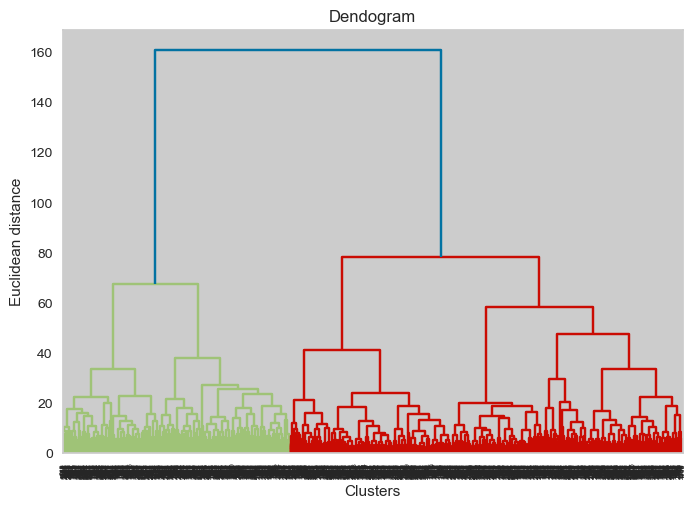

In [61]:
dendogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [62]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y_hc))
df['hc'] = y_hc

0.15417433338264142


<a id="ev_clu"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Evaluando los datos </h3>

Grafiquemos las 4 opciones que tenemos, que son `k_means`, `k_means_pca`, `hc`, `hc_pca`

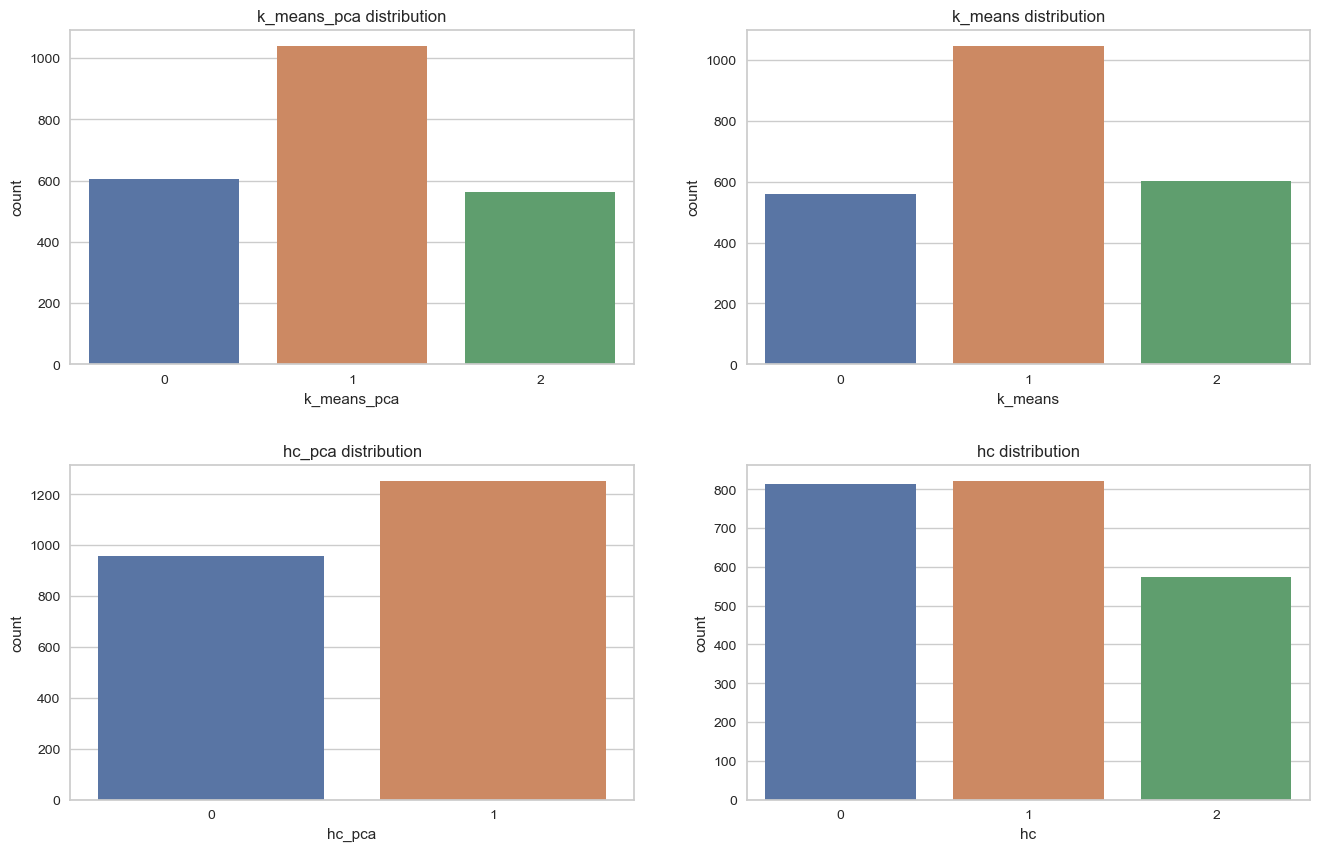

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

models = ['k_means_pca','k_means','hc_pca','hc']
for i, model in enumerate(models):
    sns.countplot(x=df[model], ax=ax.flatten()[i],hue=df[model], legend=False, palette='deep')
    ax.flatten()[i].set_title(f"{model} distribution")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

En este caso escogeremos `k_means_pca` por tener la mejor agrupación, y vamos a evaluar los ingresos y gastos que se tuvieron.

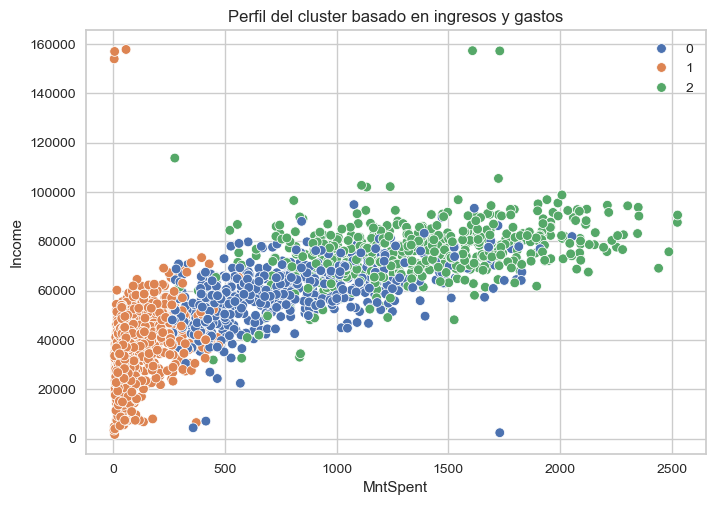

In [64]:
sns.scatterplot(data = df,x=df["MntSpent"], y=df["Income"],hue=df["k_means_pca"], palette='deep')
plt.title("Perfil del cluster basado en ingresos y gastos")
plt.legend()
plt.show()

Dividamos los datos de la siguiente manera:
- **Cluster 0:** Los que ganan poco y gastan más
- **Cluster 1:** Los que ganan poco y gastan poco
- **Cluster 2:** Los que ganan más y gastan más

<Figure size 800x550 with 0 Axes>

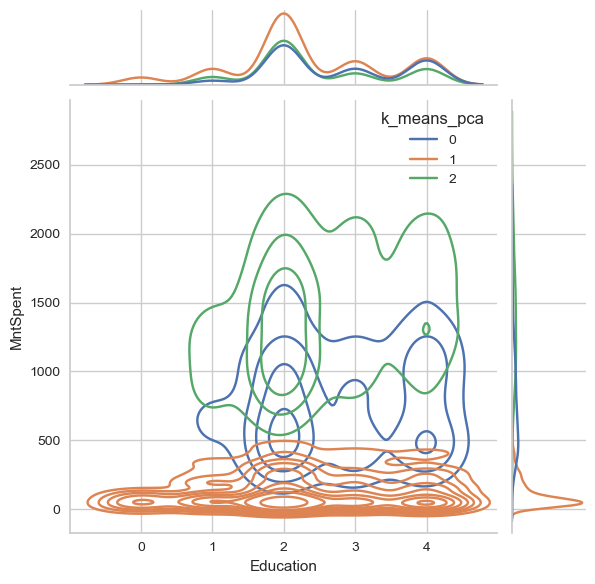

<Figure size 800x550 with 0 Axes>

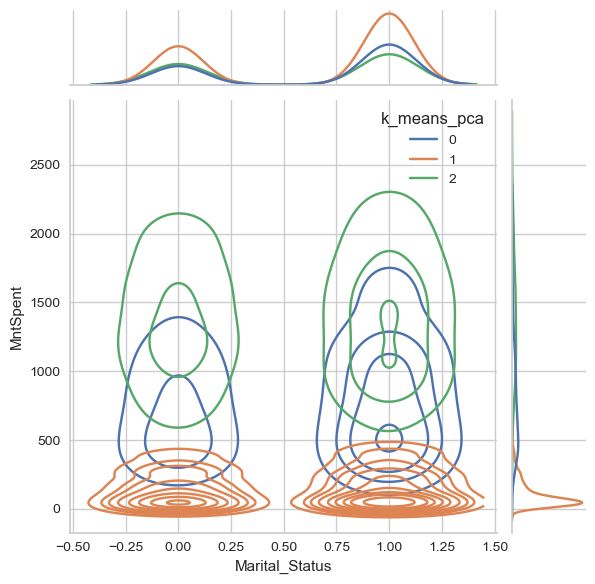

<Figure size 800x550 with 0 Axes>

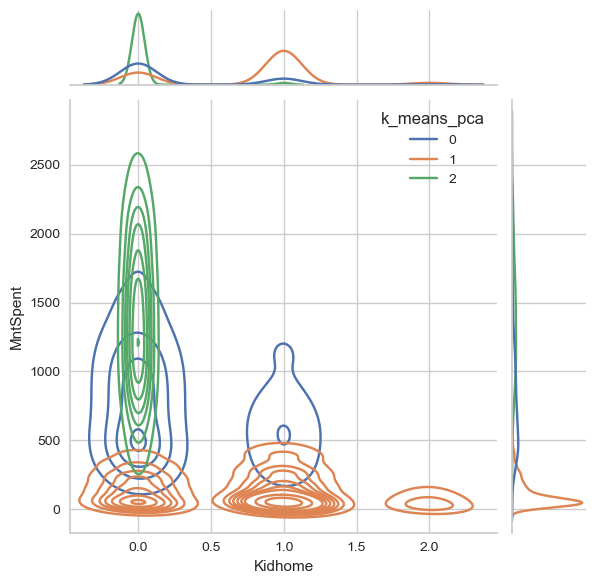

<Figure size 800x550 with 0 Axes>

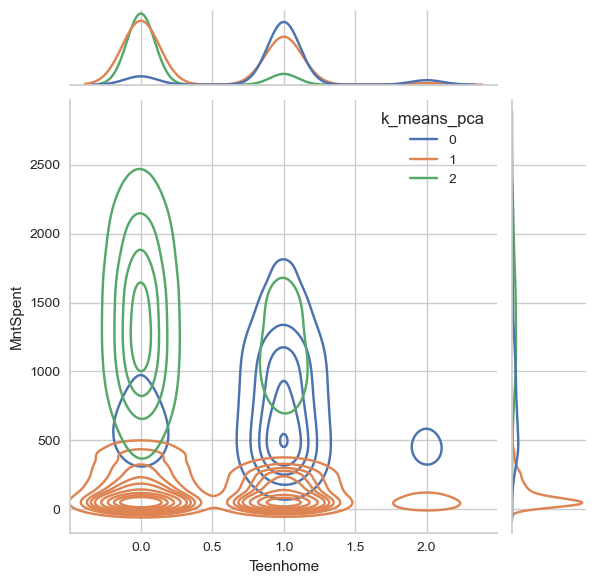

<Figure size 800x550 with 0 Axes>

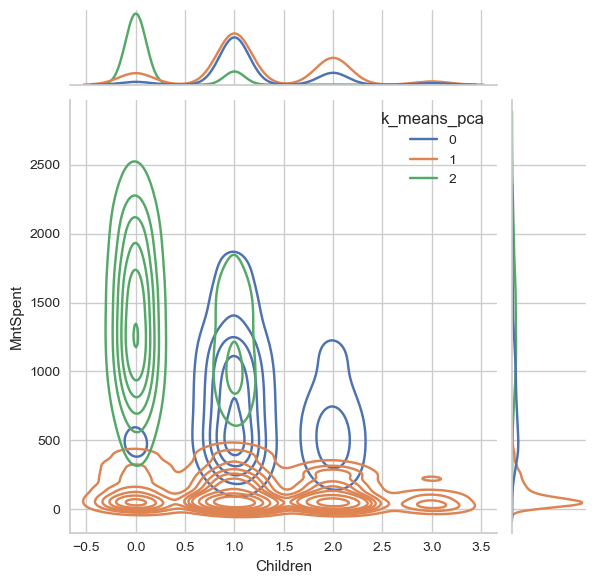

<Figure size 800x550 with 0 Axes>

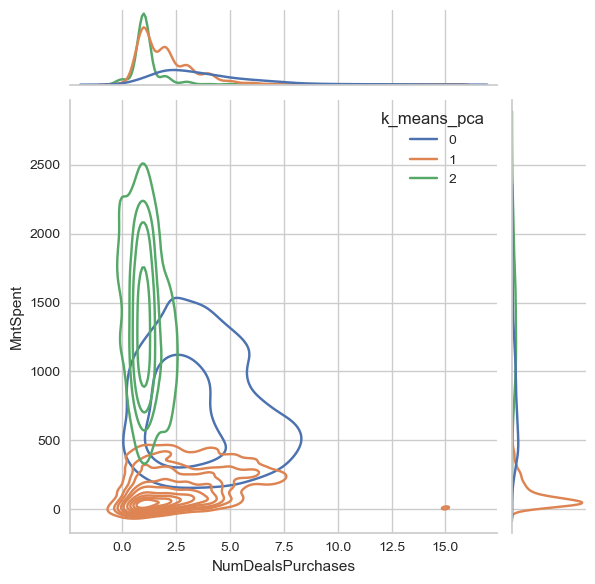

<Figure size 800x550 with 0 Axes>

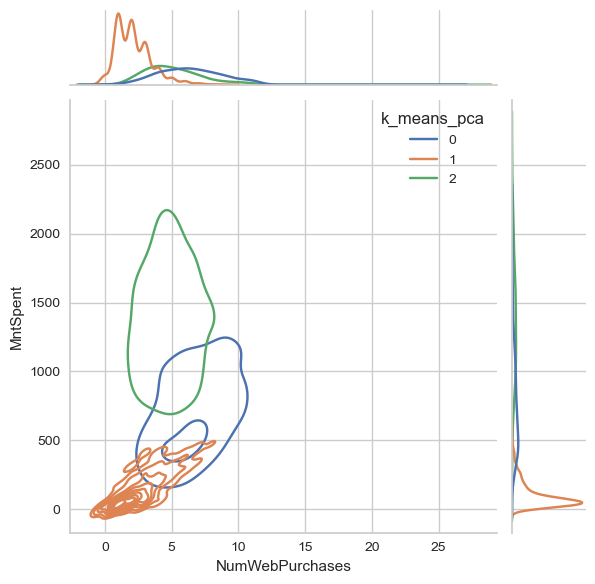

<Figure size 800x550 with 0 Axes>

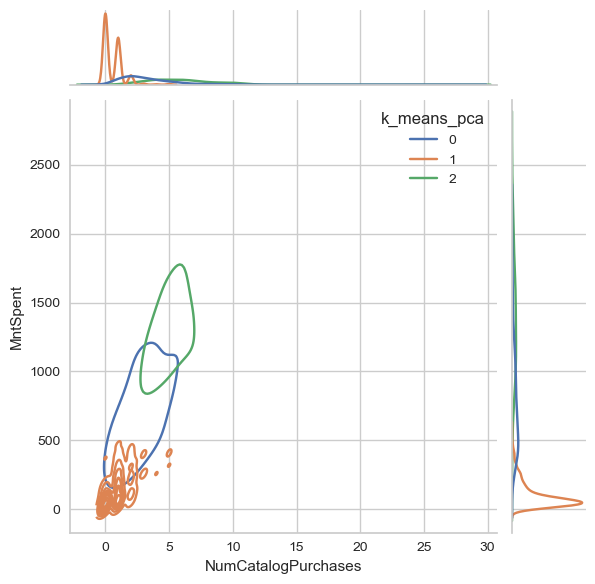

<Figure size 800x550 with 0 Axes>

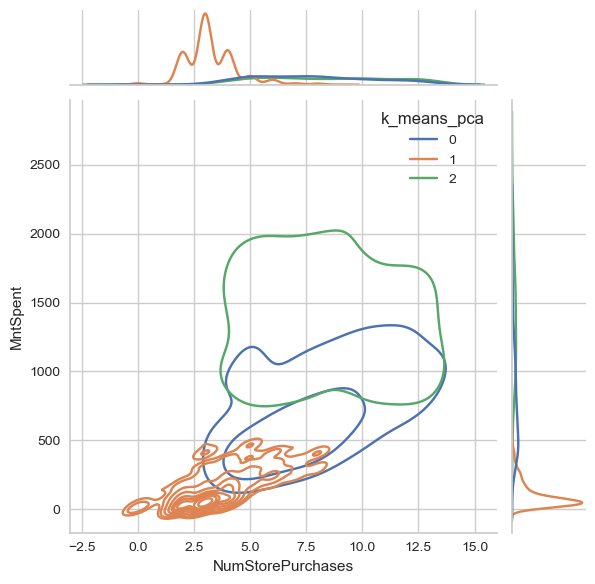

<Figure size 800x550 with 0 Axes>

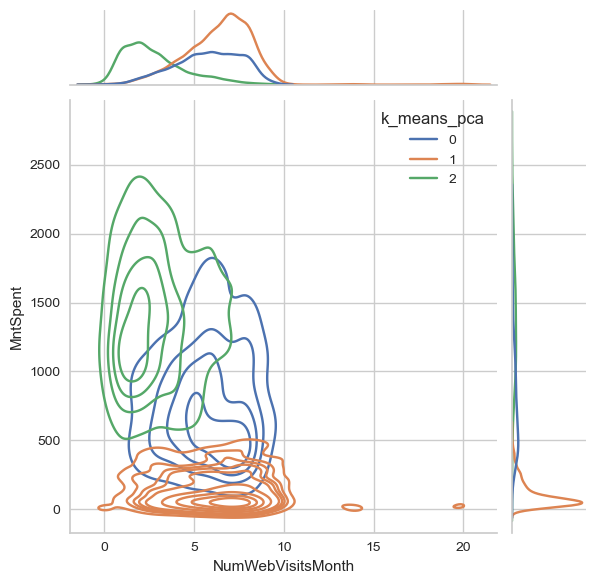

<Figure size 800x550 with 0 Axes>

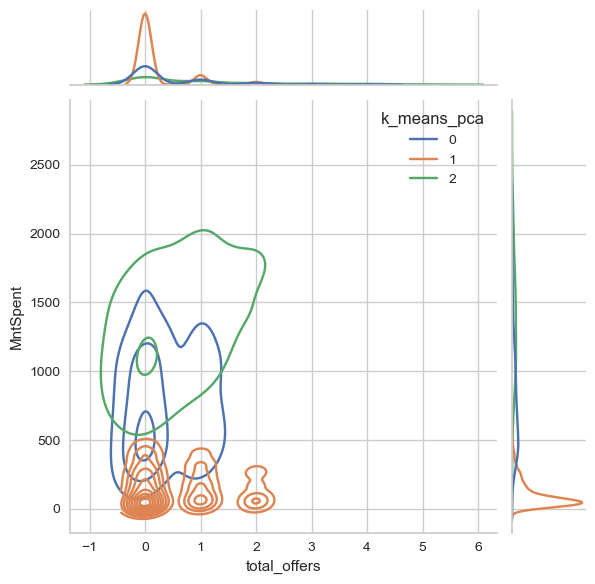

<Figure size 800x550 with 0 Axes>

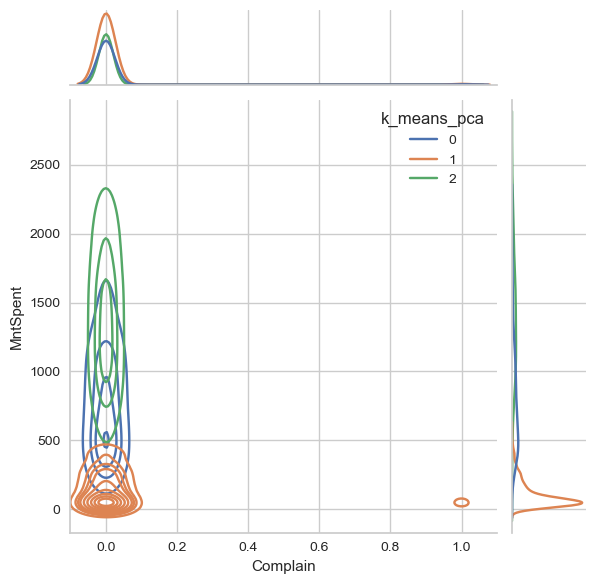

<Figure size 800x550 with 0 Axes>

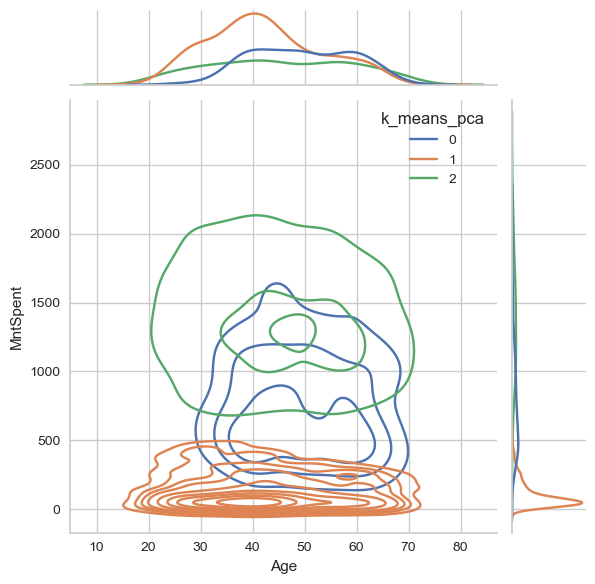

<Figure size 800x550 with 0 Axes>

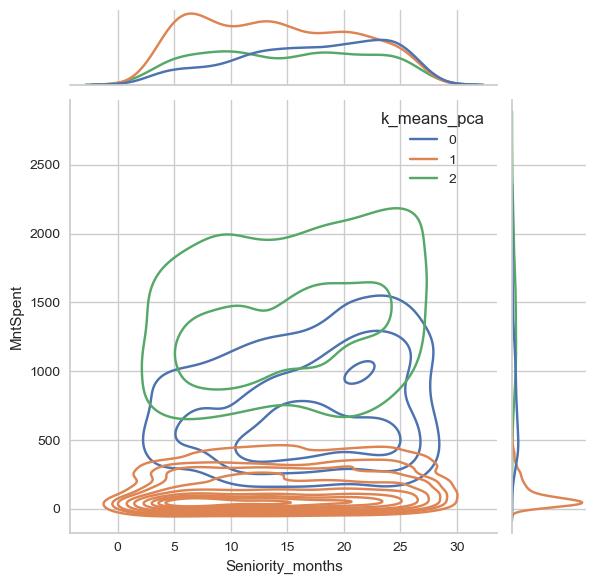

<Figure size 800x550 with 0 Axes>

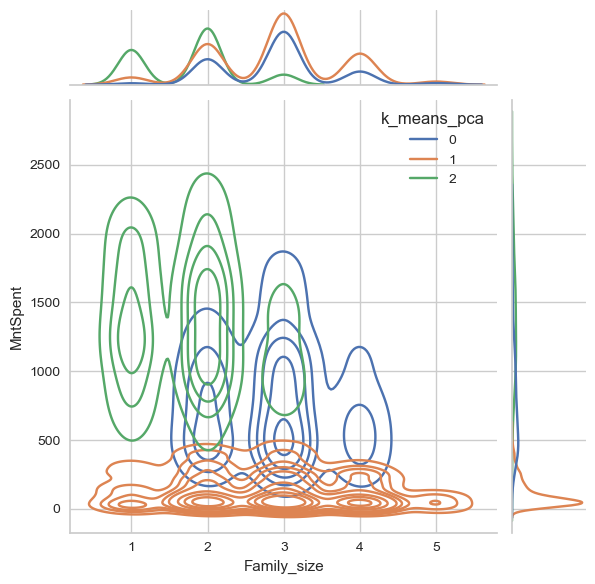

<Figure size 800x550 with 0 Axes>

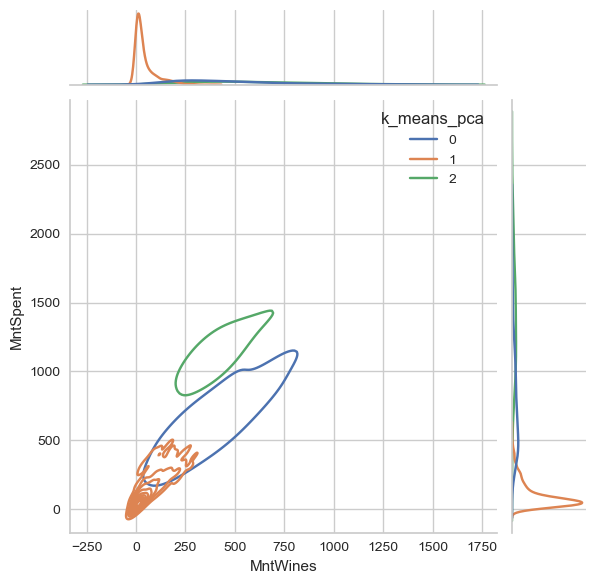

<Figure size 800x550 with 0 Axes>

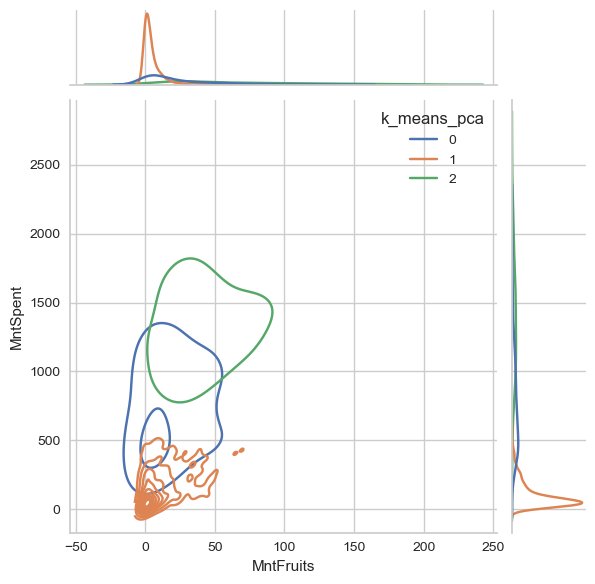

<Figure size 800x550 with 0 Axes>

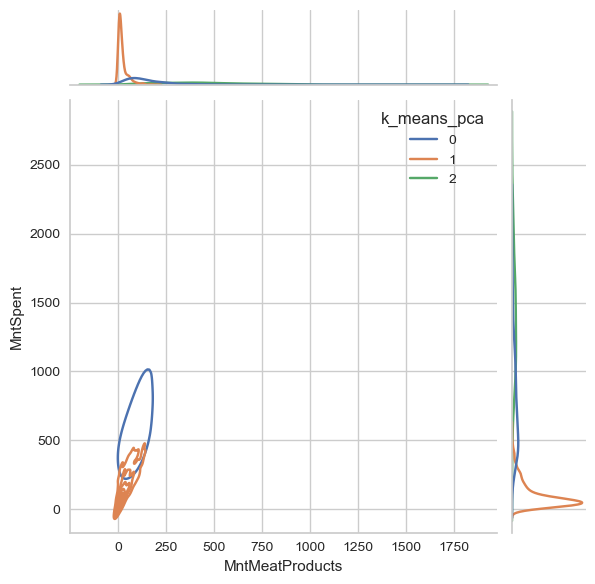

<Figure size 800x550 with 0 Axes>

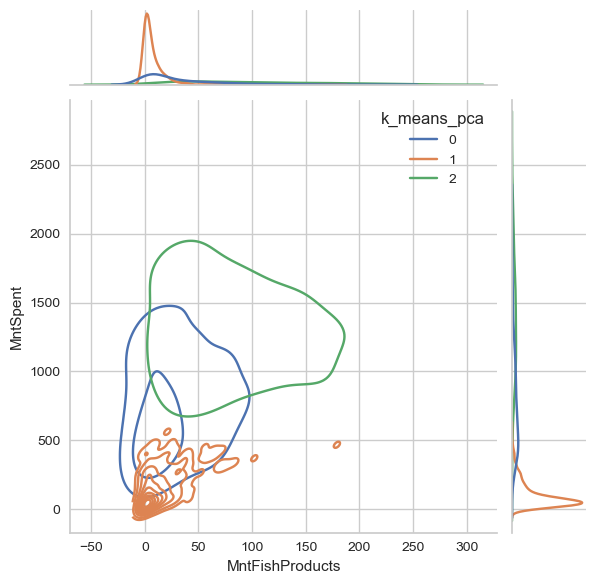

<Figure size 800x550 with 0 Axes>

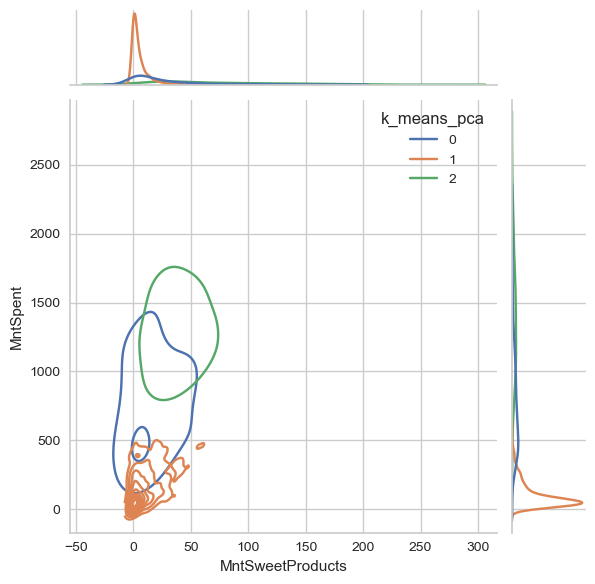

<Figure size 800x550 with 0 Axes>

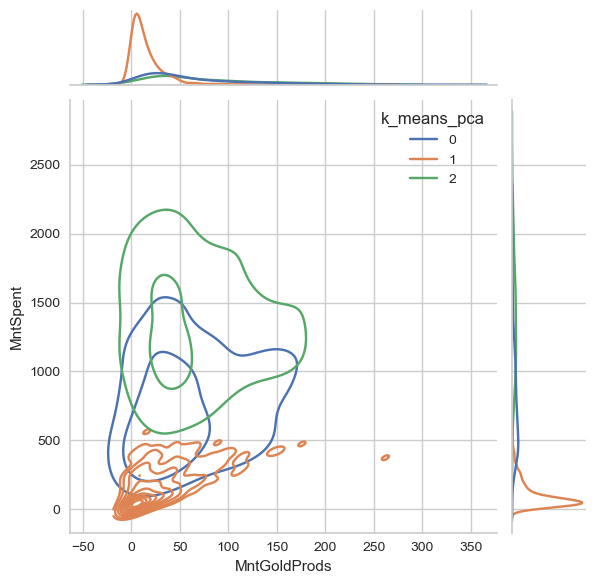

In [66]:
df['total_offers'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

i_columns = ["Education","Marital_Status",'Kidhome','Teenhome','Children','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','total_offers','Complain', 'Age','Seniority_months','Family_size','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for i in i_columns:
    plt.figure()
    sns.jointplot(x=df[i], y=df["MntSpent"], hue=df["k_means_pca"], kind='kde', palette='deep')
    plt.show()

<a id="d_clus"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Deducción </h3>

| Cluster | Descripción                               |
|---------|-------------------------------------------|
| 0       | Los que ganan poco y gastan más           |
| 1       | Los que ganan poco y gastan poco          |
| 2       | Los que ganan más y gastan más            |




 - Las personas con educación universitaria, maestría o doctorado tienden a gastar más en comparación con aquellas que solo tienen educación preparatoria o básica.
- Las personas que están en pareja muestran un mayor gasto económico.
- Existen claras diferencias en cuanto a la composición familiar basadas en los ingresos económicos. Quienes tienen mayores ingresos y realizan mayores gastos tienden a optar por no tener hijos, a diferencia de aquellos con ingresos menores, quienes suelen tener familias más numerosas. Además, las personas con menores ingresos tienden a tener más niños que adolescentes, mientras que aquellos con bajos ingresos pero altos gastos suelen tener más adolescentes que niños.
- Las personas con mayores ingresos tienden a evitar la compra de productos en oferta, en contraste con aquellos de menores ingresos, quienes prefieren aprovechar estas ofertas.
- Quienes ganan menos suelen preferir las compras en tiendas físicas en lugar de realizar compras por catálogo o en línea.
- Las personas con menores ingresos y gastos menores suelen manifestar insatisfacción con respecto a sus compras.
- Las personas entre los 30 y 50 años suelen gastar más dinero.
- Generalmente, las personas tienden a gastar más cuanto más tiempo llevan en una empresa, salvo aquellos con bajos ingresos y bajos gastos, quienes tienden a gastar más en los primeros meses.
- Las personas con mayores ingresos suelen tener familias más pequeñas, con un promedio de tres miembros (un hijo), mientras que aquellos con menores ingresos y gastos bajos suelen tener familias más numerosas.
- Quienes ganan más tienden a evitar la compra de carne, aunque en otros aspectos de su comportamiento de compra es similar. Por ejemplo: Aquellos con mayores gastos suelen invertir más en vino, pescado y oro. En contraste, quienes ganan poco y gastan poco rara vez compran oro, centrándose principalmente en alimentos, aunque aquellos con bajos ingresos pero altos gastos suelen adquirir más vino.


<a id="dt"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Decision tree </h2>

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import category_encoders as ce
from sklearn.metrics import accuracy_score
import graphviz
import pydotplus

Hagamos una copia de nuestro dataset y volvamos a colocar las variables categóricas

In [68]:
df_tree = df.copy()
df_tree['Marital_Status'] = df_tree['Marital_Status'].map({0: 'Soltero', 1: 'Pareja'})
df_tree['Education'] = df_tree['Education'].map(
    {0: 'Básica',
    1: 'Preparatoria',
    2: 'Universidad',
    3: 'Maestría',
    4: 'Doctorado'})
df_tree.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Children,MntSpent,Seniority_months,Family_size,k_means_pca,k_means,hc_pca,hc,total_offers
0,Universidad,Soltero,58138.0,0,0,58,635,88,546,172,...,57,0,1617,25.0,1,2,0,0,0,1
1,Universidad,Soltero,46344.0,1,1,38,11,1,6,2,...,60,2,27,7.0,3,1,1,1,1,0
2,Universidad,Pareja,71613.0,0,0,26,426,49,127,111,...,49,0,776,14.0,2,2,0,0,0,0
3,Universidad,Pareja,26646.0,1,0,26,11,4,20,10,...,30,1,53,8.0,3,1,1,1,2,0
4,Doctorado,Pareja,58293.0,1,0,94,173,43,118,46,...,33,1,422,9.0,3,0,1,0,2,0


Ahora escogeremos los valores que queremos para nuestro árbol de decisión, para ello, separaremos de la siguiente manera: 
- `X`: Representan los valores con los que se evaluara la toma de decisiones (características de entrada)
- `y`: Representa nuestra variable clase (destino/target)

In [69]:
features = ['Education', 'Marital_Status', 'Family_size', 'Age', 'Income']
X = df_tree[features]
y = df_tree['Response']

Ahora definiremos 30% de nuestros datos para el test y 70% para el train

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 42)

Veamos que obtuvimos

In [71]:
X_train.shape, X_test.shape

((1547, 5), (663, 5))

In [72]:
y_train.shape, y_test.shape

((1547,), (663,))

Realizamos la transformación de variables categoricas a numéricas y lo aplicamos tanto a los datos de train como de test

In [73]:
encoder = ce.OrdinalEncoder(cols = features)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Verificamos la transformación

In [74]:
X_train.head()

,Education,Marital_Status,Family_size,Age,Income
414,1,1,1,1,1
600,1,2,2,2,2
1739,2,1,1,3,3
1531,3,1,3,4,4
305,4,1,2,2,5


Creamos el modelo

In [75]:
tree  =  DecisionTreeClassifier(max_depth=4, random_state=0)

Aplicamos ahora la etapa de entrenamiento

In [76]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

Realizamos el cálculo de las predicciones en Train y Test

In [77]:
y_train_tree_pred = tree.predict(X_train)
y_test_tree_pred = tree.predict(X_test)

Ahora evaluemos el modelo de clasificación con árbol de decisión calculando las métricas

In [78]:
train_accuracy = accuracy_score(y_train, y_train_tree_pred)
test_accuracy = accuracy_score(y_test, y_test_tree_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.8629605688429218
El accuracy en test es: 0.8129713423831071


Verificamos el feature importances

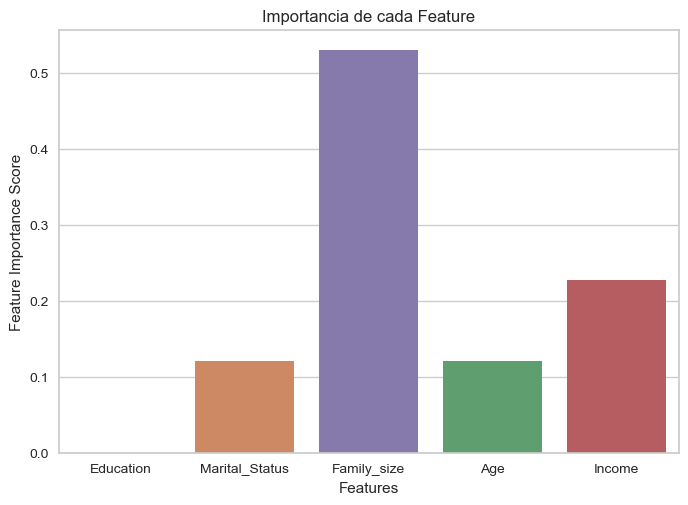

In [79]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, hue=importances.round(7), legend=False, palette='deep')
plt.title('Importancia de cada Feature')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.show()

Exportamos el árbol de decisión a un archivo de Graphviz

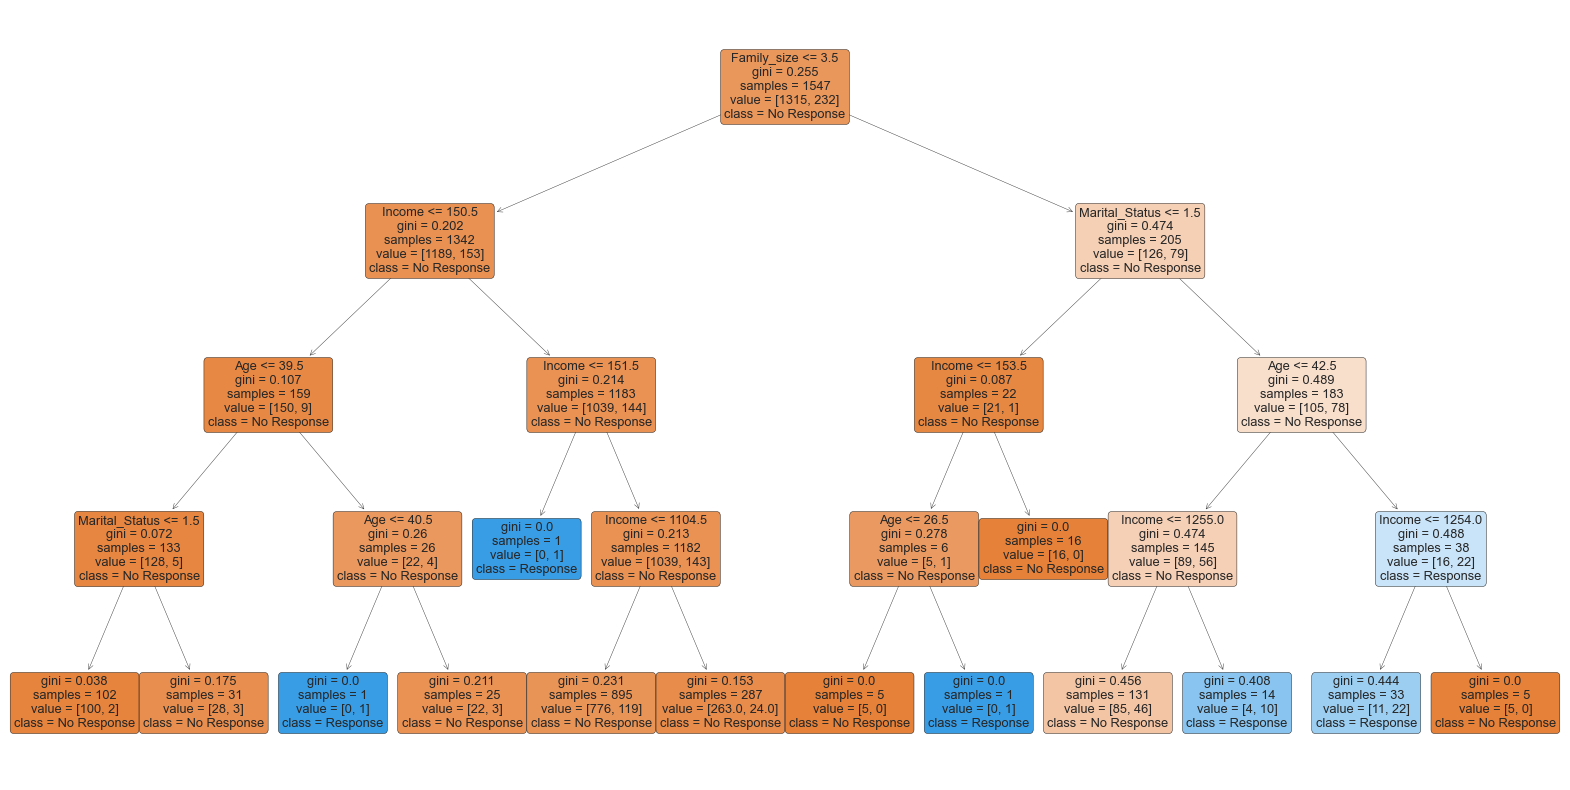

In [80]:
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=features,
    class_names=['No Response', 'Response'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Renderizar el archivo de Graphviz
graph = graphviz.Source(dot_data)

# Exportar el árbol de decisión a un archivo PDF usando pydotplus
graph_pdf = pydotplus.graph_from_dot_data(dot_data)
graph_pdf.write_pdf("arbol_decision.pdf")

# Mostrando el árbol utilizando matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['No Response', 'Response'], filled=True, rounded=True)
plt.savefig("arbol_decision.png")  
plt.show()

<a id="d_dt"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Deducción </h3>

Al analizar el gráfico de importancia de características, se observa que los parámetros más influyentes para la decisión de aceptar la última oferta son si el cliente tiene pareja, su nivel educativo, el número de integrantes en la familia, la edad y el ingreso. Notablemente, el número de integrantes en la familia y el nivel de ingreso destacan como los principales factores determinantes en nuestro árbol de decisión, aunque los demás campos son considerados relevantes, estos dos sobresalen significativamente.

Además, al estudiar nuestro árbol de decisión, se concluye que los clientes que tienden a aceptar la última oferta suelen pertenecer a familias con más de tres integrantes, estar en pareja y tener un ingreso inferior a `$30,000.00`.

<a id="randForest"> </a>
<h2 style="text-align: center; background: #157991; font-weight: 600; color: #FFF; padding: 5px 0"> Random Forest </h2>

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Escogemos igualmente los valores que queremos para nuestro Randmo Forest, para ello, separaremos de la siguiente manera: 
- `X`: Representan los valores con los que se evaluara la toma de decisiones (características de entrada)
- `y`: Representa nuestra variable clase (destino/target)

In [82]:
features = ['Education', 'Marital_Status', 'Family_size', 'Age', 'Income']
X = df[features]
y = df['Response']

Ahora definiremos 30% de nuestros datos para el test y 70% para el train

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 00000)

Creamos el modelo

In [84]:
random_forest = RandomForestClassifier(n_estimators=10, random_state= 00000)

Entrenamos nuestro modelo

In [85]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

Ahora realizamos el cálculo de las predicciones en Train y Test

In [86]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

Evaluemos nuestro modelo, para ello, calculemos primero las métricas del accuracy en Train y Test

In [87]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.9676793794440853
El accuracy en test es: 0.8340874811463047


Verifiquemos el feature importances

In [88]:
feature_importances_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance': random_forest.feature_importances_}
).sort_values('importance', ascending=False)

feature_importances_df

,feature,importance
4,Income,0.543219
3,Age,0.279815
2,Family_size,0.083754
0,Education,0.077183
1,Marital_Status,0.016028


Grafiquemos nuestros feature importances

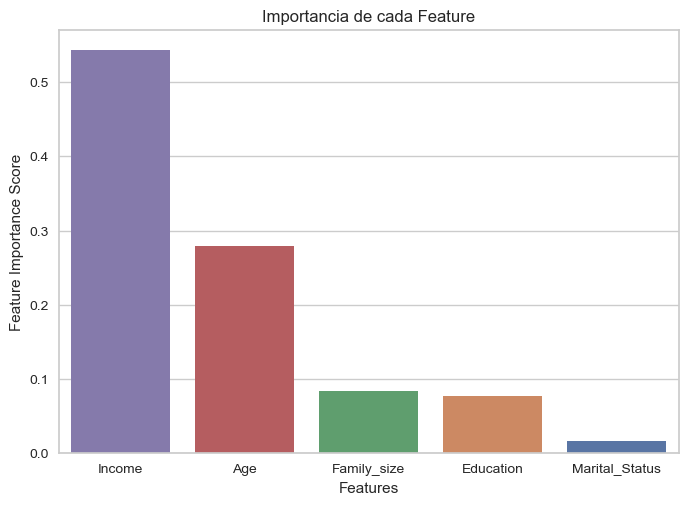

In [89]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance, hue=round(feature_importances_df.importance, 4), 
            legend= False, palette='deep')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Importancia de cada Feature')
plt.show()

<a id="d_rand"> </a>
<h3 style="text-align: center; background: #17a4a6; font-weight: 600; color: #FFF; padding: 5px 0"> Deducción </h3>

Al representar los mismos datos mediante un análisis de Random Forest, observamos un cambio en la importancia atribuida a cada característica, ahora se destaca que la decisión de un cliente de aceptar la última oferta depende principalmente de su ingreso y edad. Consecuentemente, el tamaño de la familia, el nivel educativo y si está en pareja no son tan relevantes en este análisis, a diferencia de nuestro primer modelo de árbol, este enfoque muestra una precisión mayor.